In [1]:
import glob

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs

from unseen import fileio

In [2]:
all_dry_years = np.array([1901, 1902, 1922, 1937, 1940, 1944, 1948, 1957, 1972, 1980, 1994, 2002, 2009, 2018, 2019])
all_wet_years = np.array([1917, 1920, 1921, 1931, 1955, 1958, 1963, 1971, 1973, 1974, 1975, 1978, 1988, 1999, 2011, 2016])

In [39]:
def detrend(da, dim, deg=1):
    """Linearly detrend along given dimension"""
    
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p['polyfit_coefficients'])
    fit_anom = fit - fit.isel({dim: 0})
    
    return da - fit_anom

In [5]:
def plot_data(da, levels, cmap='viridis_r'):
    """Plot the data"""
    
    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
    da.plot.contourf(ax=ax,
                     levels=levels,
                     extend='both',
                     transform=ccrs.PlateCarree(),
                     cmap=cmap)
    ax.coastlines()
    plt.show()

## SST

SST composites for Jan-Mar (ENSO) and Aug-Dec (IOD).

In [6]:
#sst_file = '/g/data/ua8/HadISST/v1-1/HadISST_sst.nc'
sst_file = '/Users/irv033/Downloads/HadISST_sst.nc'

In [7]:
#metadata_file = '/home/599/dbi599/unseen/config/dataset_hadisst.yml'
metadata_file = '/Users/irv033/Documents/code/unseen/config/dataset_hadisst.yml'
sst_ds = fileio.open_dataset(sst_file, metadata_file=metadata_file)

In [8]:
sst_ds

<xarray.Dataset>
Dimensions:    (time: 1822, nv: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 1870-01-16 11:59:59.505615 ... 2021-10-16 12:00:00
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 dask.array<chunksize=(1822, 2), meta=np.ndarray>
    sst        (time, lat, lon) float32 dask.array<chunksize=(1822, 180, 360), meta=np.ndarray>
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/12/2021 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [9]:
def is_jfm(month):
    """Is Jan-Mar season"""
    return month <= 3

def is_asond(month):
    "Is Aug-Dec season"
    return month >= 8

In [10]:
sst_JFM = sst_ds['sst'].sel({'time': is_jfm(sst_ds['time.month'])}).groupby('time.year').mean('time', keep_attrs=True)
sst_ASOND = sst_ds['sst'].sel({'time': is_asond(sst_ds['time.month'])}).groupby('time.year').mean('time', keep_attrs=True)

In [35]:
def calc_anomaly(da, base_period, detrend_data=False):
    """Calculate anomaly"""
    
    if detrend_data:
        data = detrend(da, 'year', deg=1)
    else:
        data = da
    
    start_year, end_year = base_period
    clim = data.sel({'year': slice(1971, 2000)}).mean('year', keep_attrs=True)
    anom = data - clim
    
    return anom

In [42]:
sst_JFM_anom = calc_anomaly(sst_JFM, [1971, 2000])
sst_JFM_anom_detrended = calc_anomaly(sst_JFM, [1971, 2000], detrend_data=True)

sst_ASOND_anom = calc_anomaly(sst_ASOND, [1971, 2000])
sst_ASOND_anom_detrended = calc_anomaly(sst_ASOND, [1971, 2000], detrend_data=True)

### Jan-Mar, dry years

#### Composite

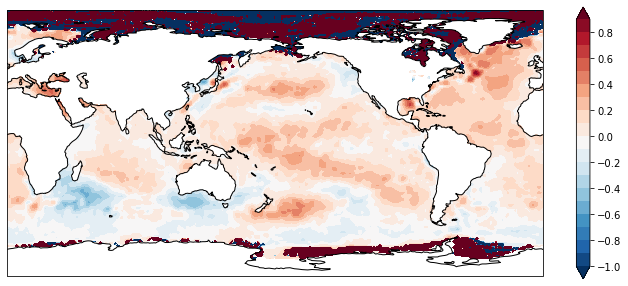

In [47]:
plot_data(sst_JFM_anom_detrended.sel(year=all_dry_years).mean('year'),
          np.arange(-1, 1, 0.1),
          cmap='RdBu_r')

#### Individual years

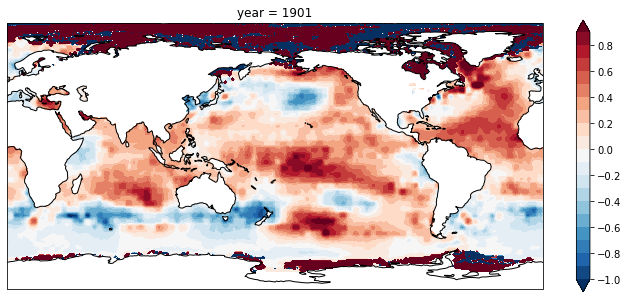

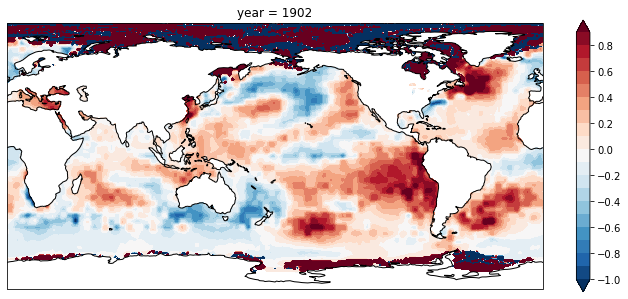

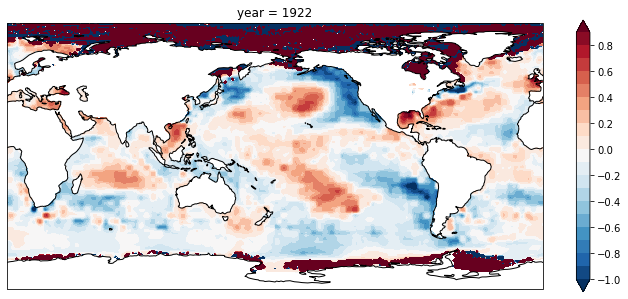

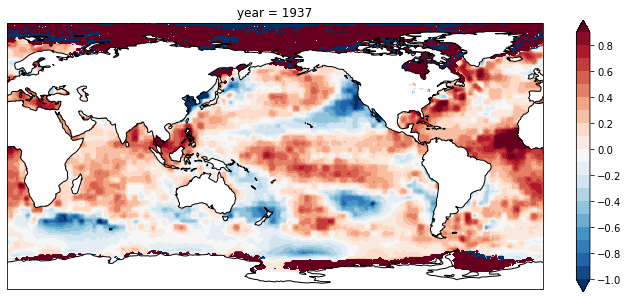

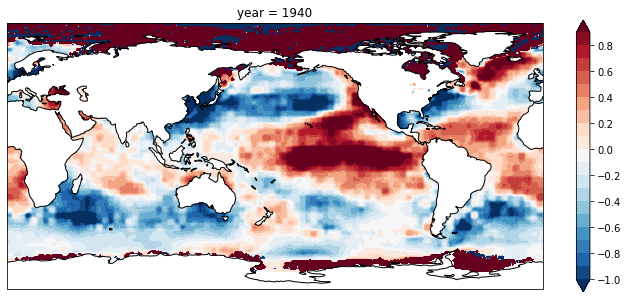

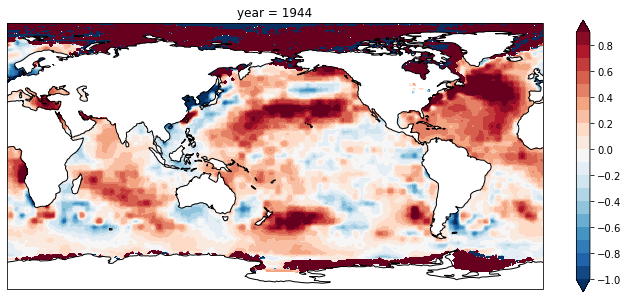

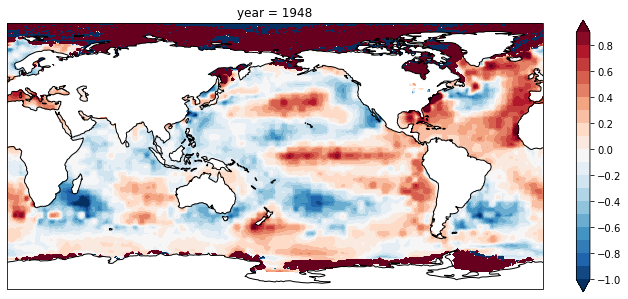

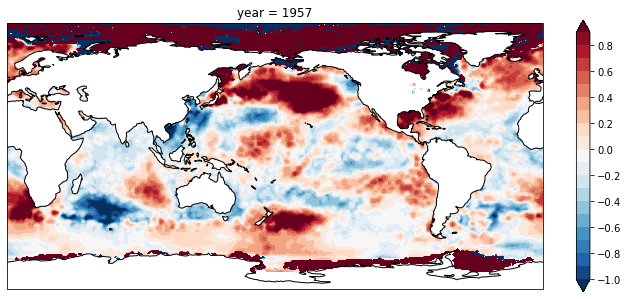

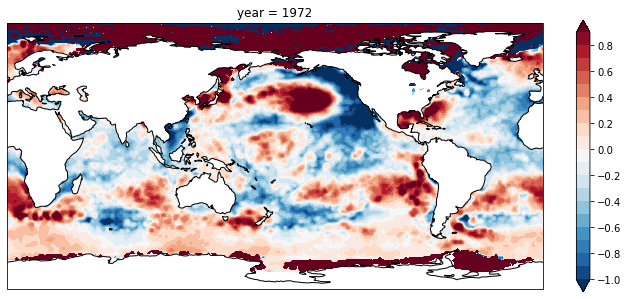

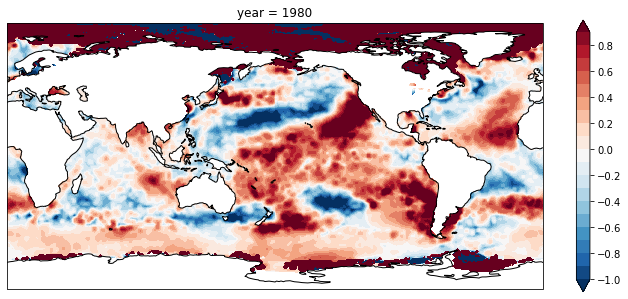

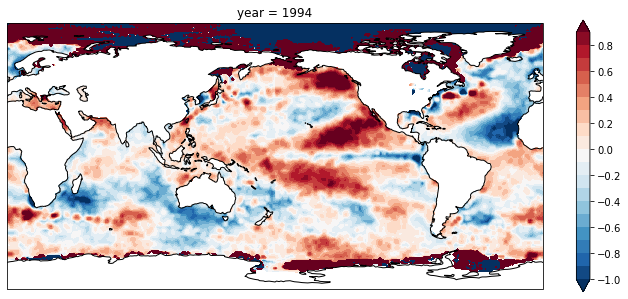

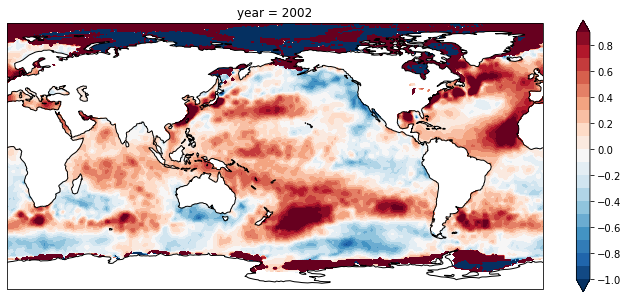

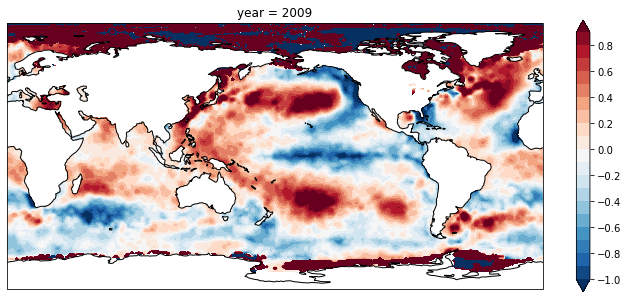

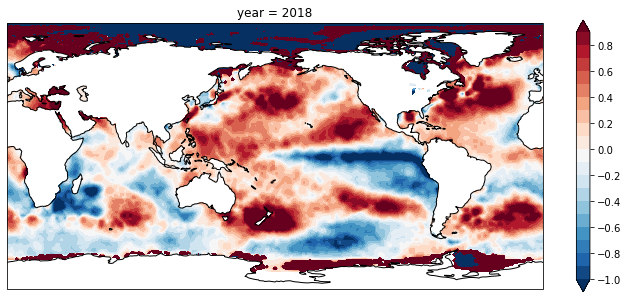

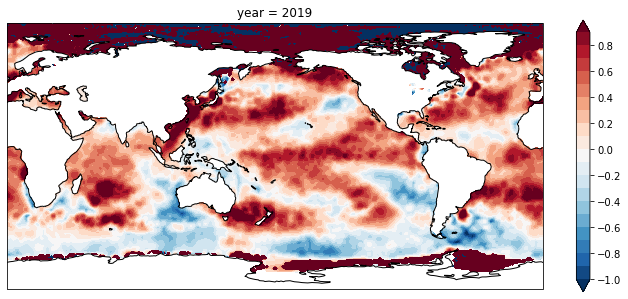

In [44]:
for year in all_dry_years:
    plot_data(sst_JFM_anom_detrended.sel(year=year), np.arange(-1, 1, 0.1), cmap='RdBu_r')

### Jan-Mar, wet years

#### Composite

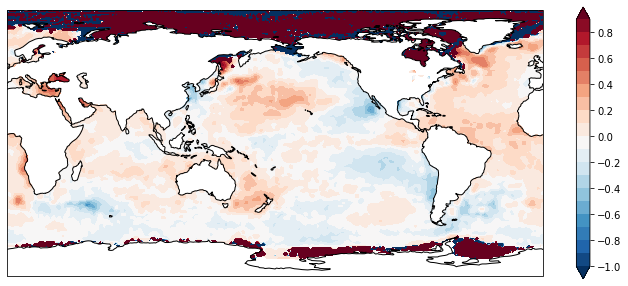

In [49]:
plot_data(sst_JFM_anom_detrended.sel(year=all_wet_years).mean('year'),
          np.arange(-1, 1, 0.1),
          cmap='RdBu_r')

#### Individual years

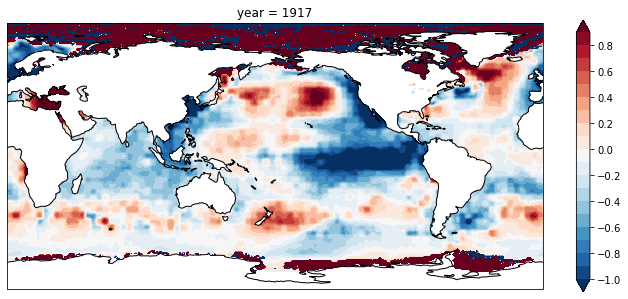

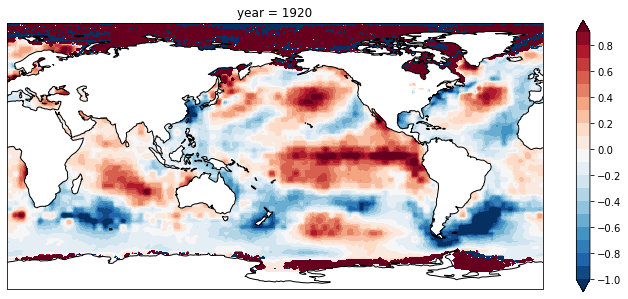

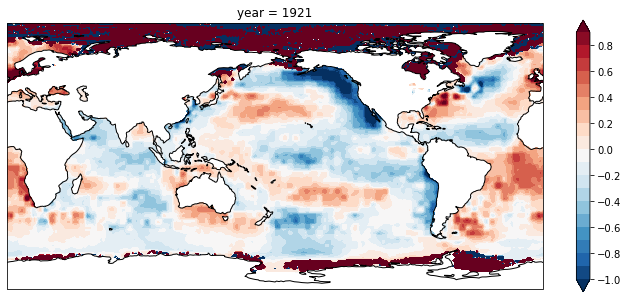

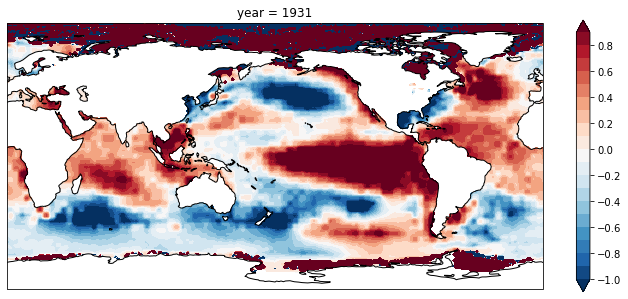

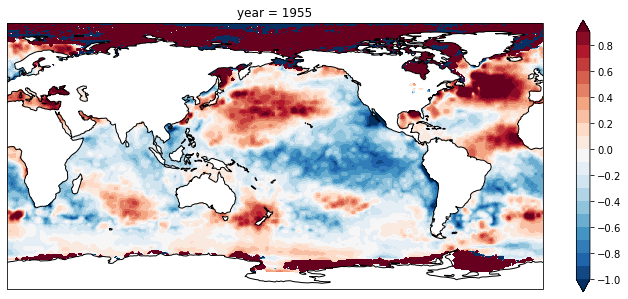

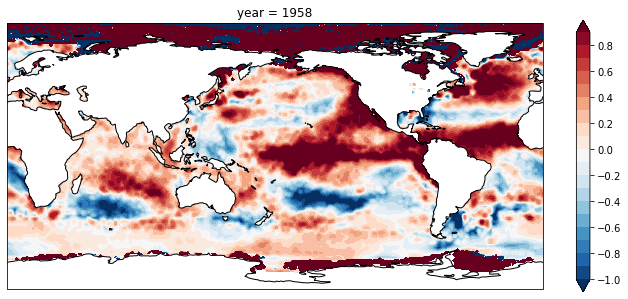

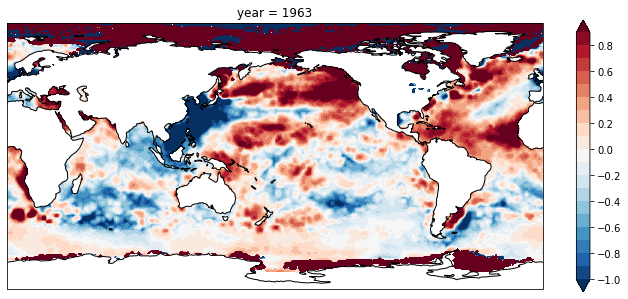

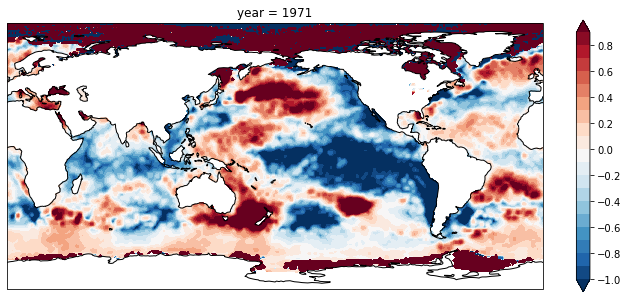

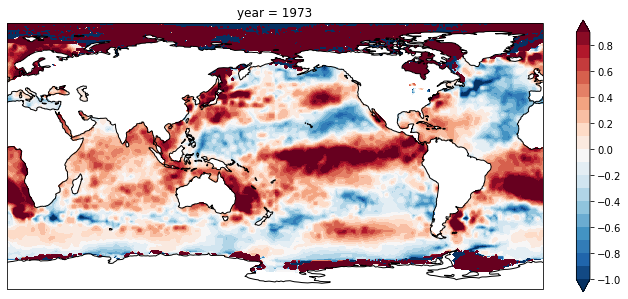

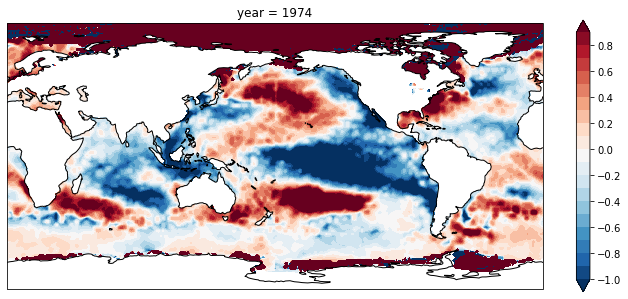

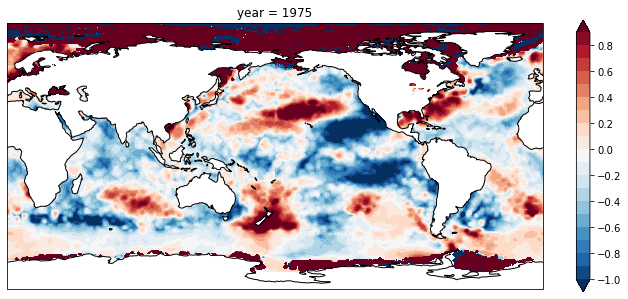

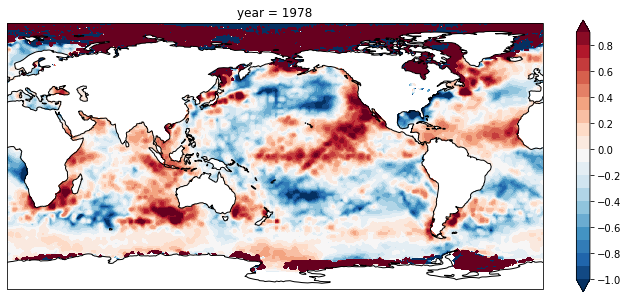

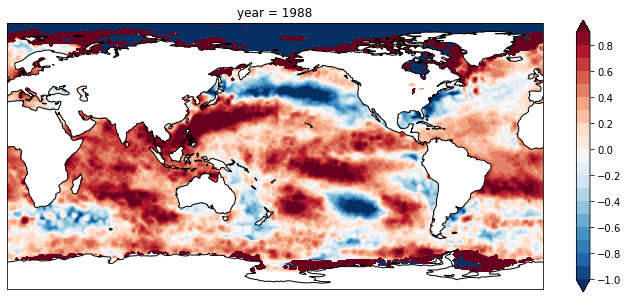

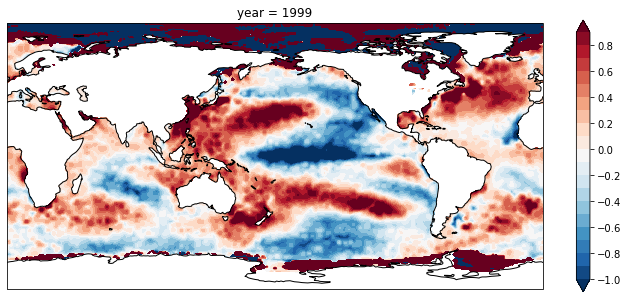

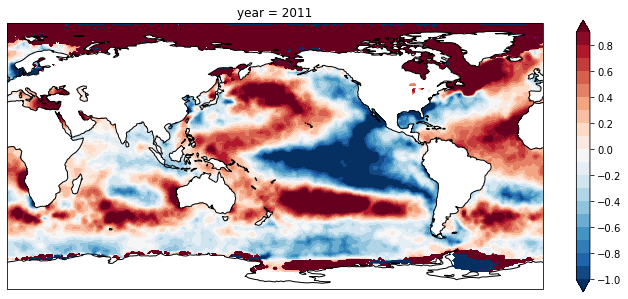

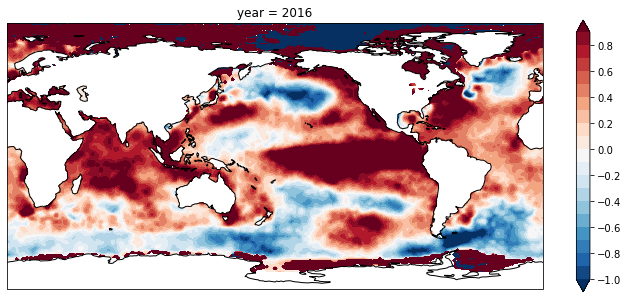

In [50]:
for year in all_wet_years:
    plot_data(sst_JFM_anom_detrended.sel(year=year), np.arange(-1, 1, 0.1), cmap='RdBu_r')

### Aug-Dec, dry years

#### Composite

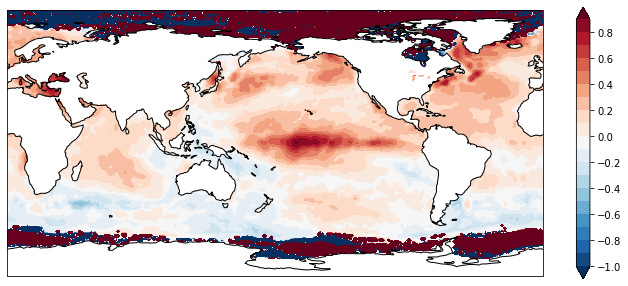

In [51]:
plot_data(sst_ASOND_anom_detrended.sel(year=all_dry_years).mean('year'),
          np.arange(-1, 1, 0.1),
          cmap='RdBu_r')

#### Individual years

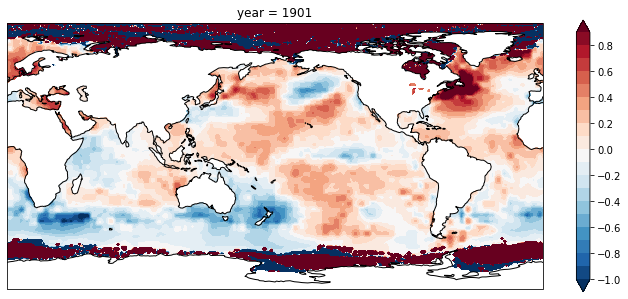

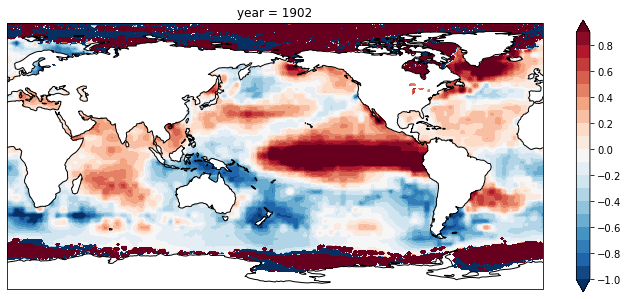

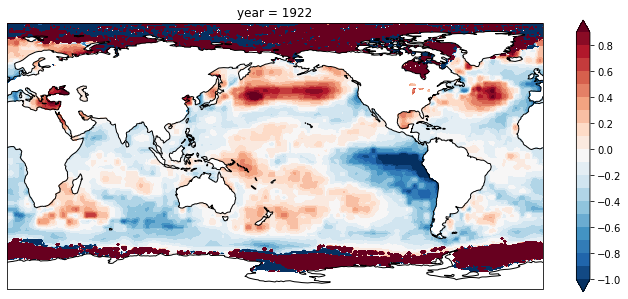

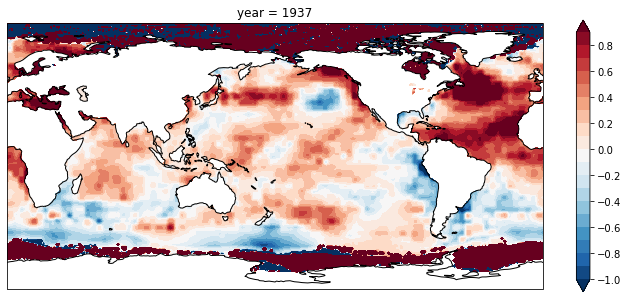

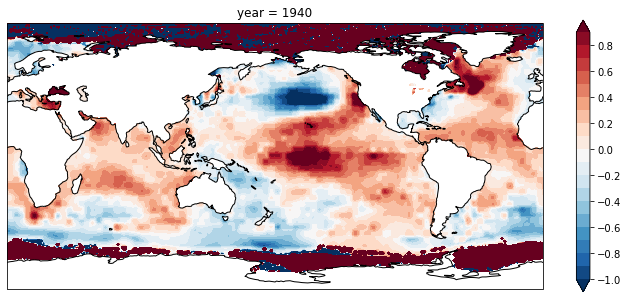

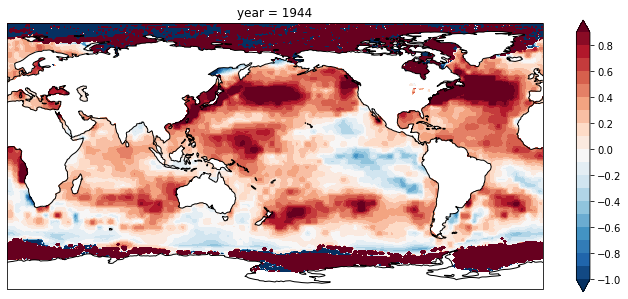

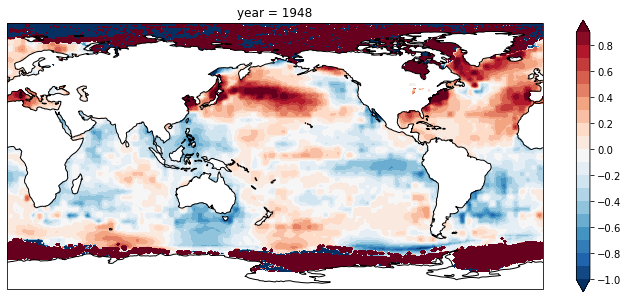

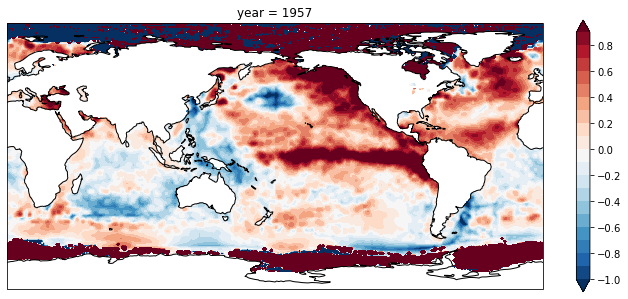

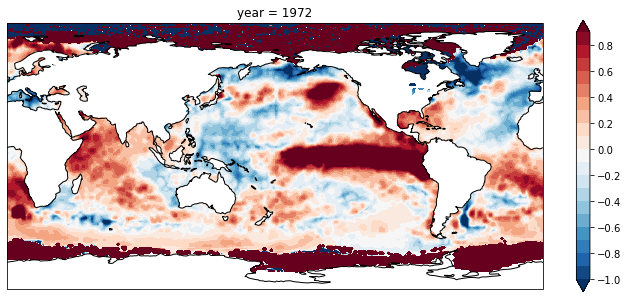

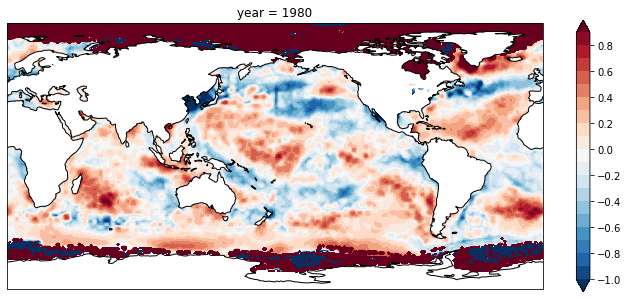

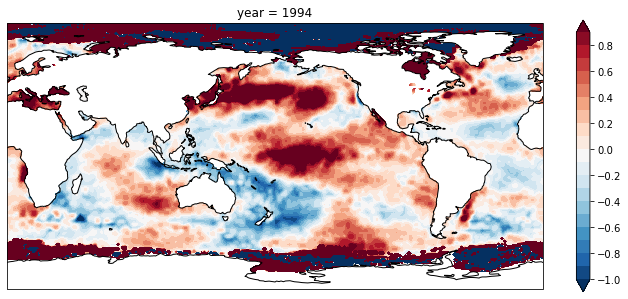

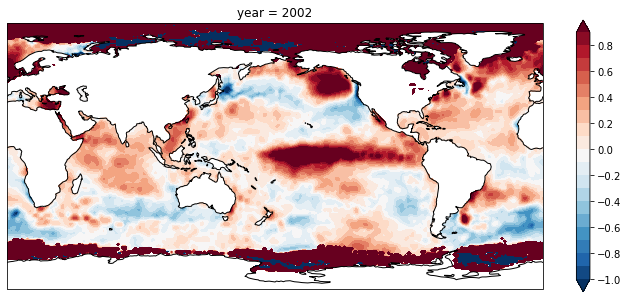

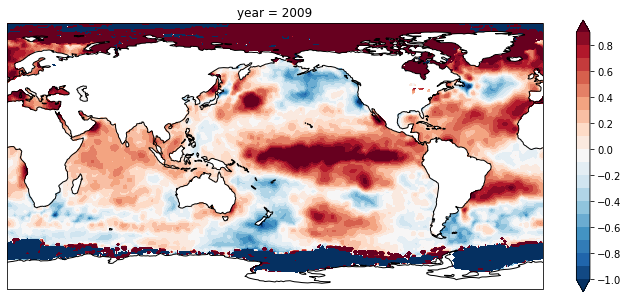

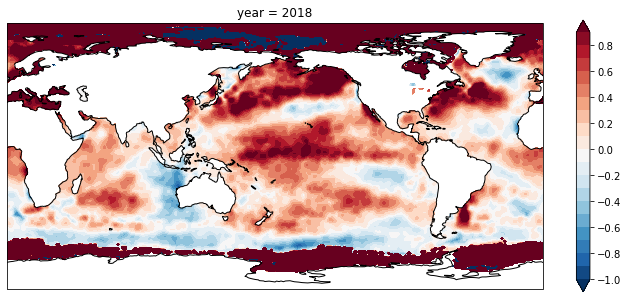

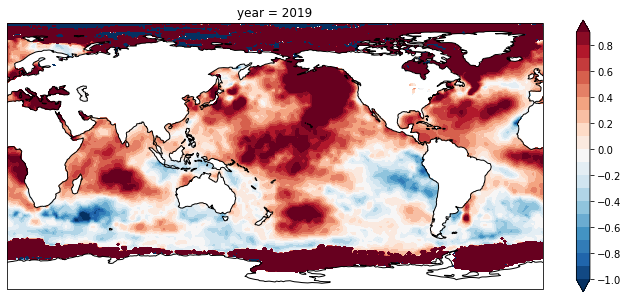

In [52]:
for year in all_dry_years:
    plot_data(sst_ASOND_anom_detrended.sel(year=year), np.arange(-1, 1, 0.1), cmap='RdBu_r')

### Aug-Dec, wet years

#### Composite

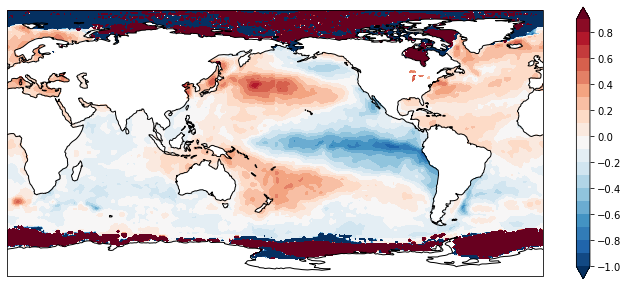

In [53]:
plot_data(sst_ASOND_anom_detrended.sel(year=all_wet_years).mean('year'),
          np.arange(-1, 1, 0.1),
          cmap='RdBu_r')

#### Individual years

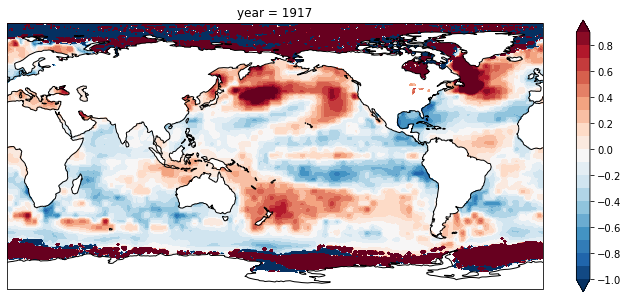

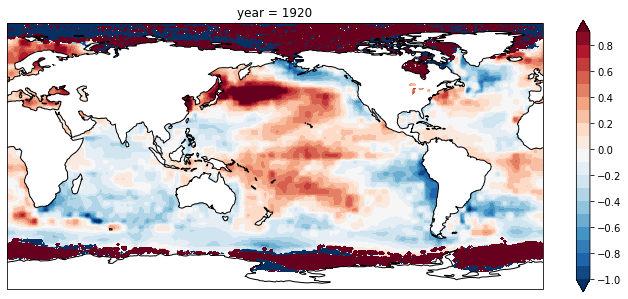

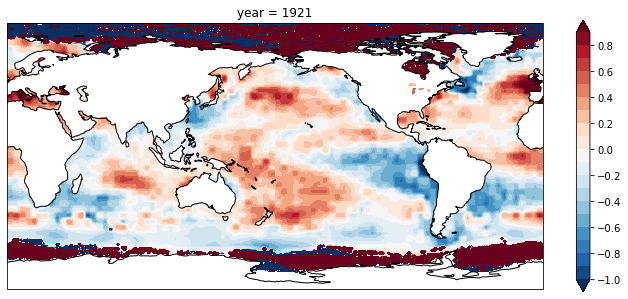

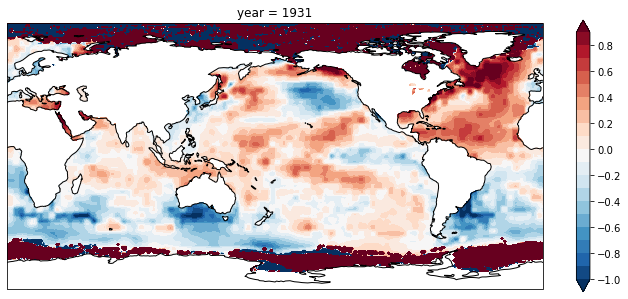

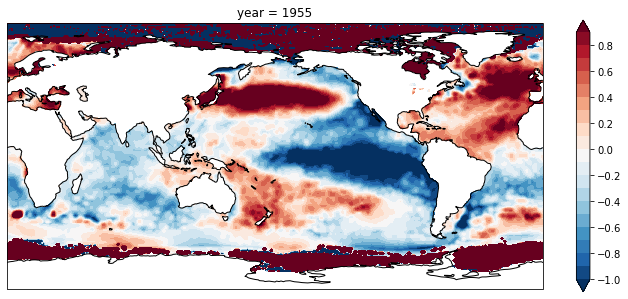

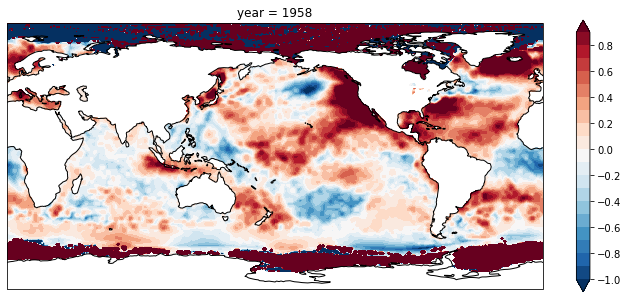

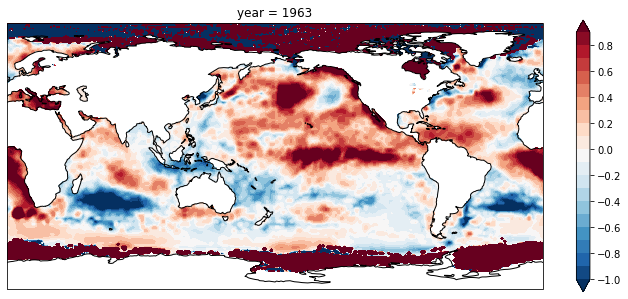

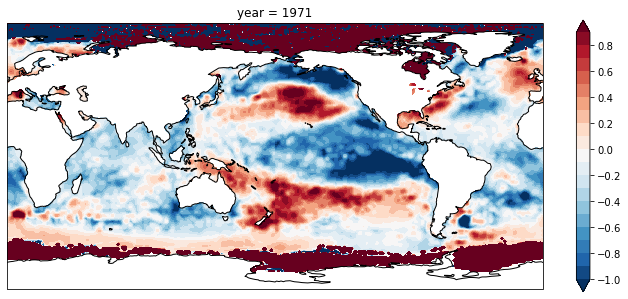

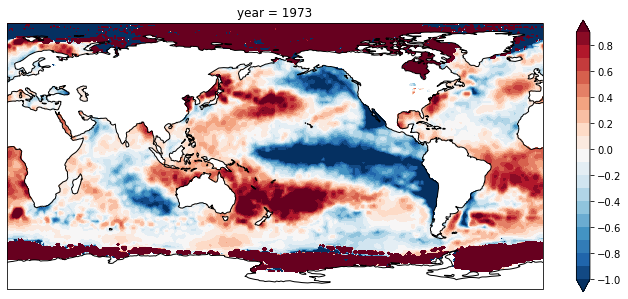

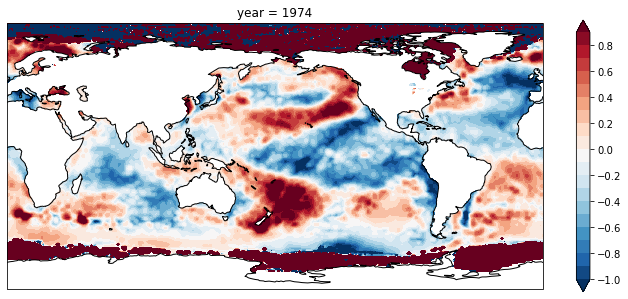

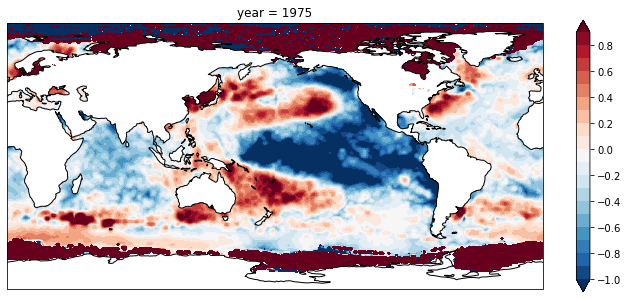

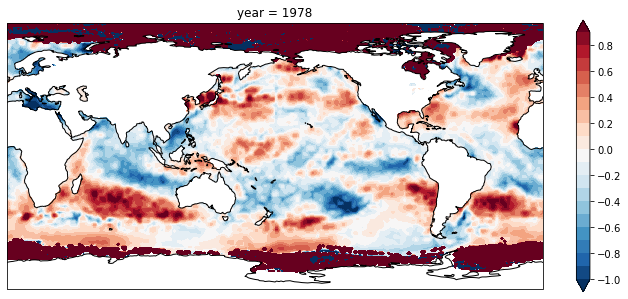

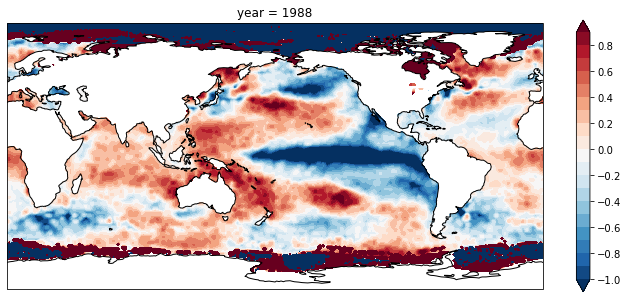

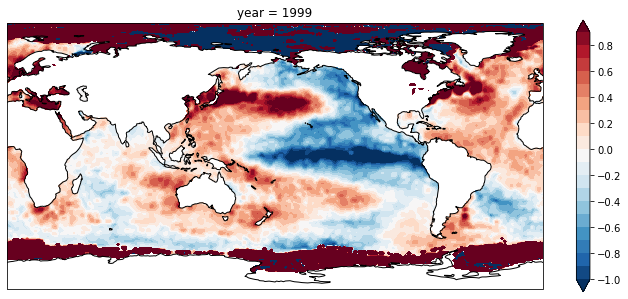

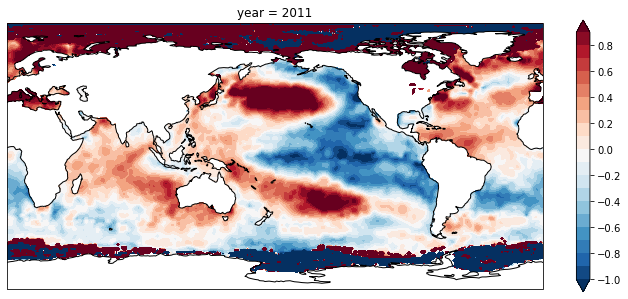

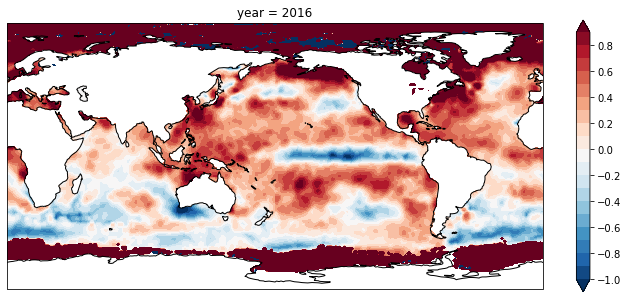

In [54]:
for year in all_wet_years:
    plot_data(sst_ASOND_anom_detrended.sel(year=year), np.arange(-1, 1, 0.1), cmap='RdBu_r')

## Z500

Z500 anomaly composites for MAM, JJA, SON (to indicate what the SAM is doing).

In [6]:
era5_files = glob.glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/z/*/z_era5_moda_pl_*.nc')
era5_files.sort()
era5_files

[]

In [10]:
era5_ds = fileio.open_dataset(era5_files[0], metadata_file='/home/599/dbi599/unseen/config/dataset_era5_monthly.yml')

In [11]:
era5_ds

<xarray.Dataset>
Dimensions:  (lat: 721, level: 37, lon: 1440, time: 1)
Coordinates:
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * level    (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time     (time) object 1979-01-01 00:00:00
Data variables:
    z        (time, level, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 pressure-levels monthly-averaged geopotential 19790101...
    history:      2020-11-06 10:07:56 UTC+1100 by era5_replication_tools-1.5....